In [355]:
import numpy as np
import statistics as stats
import random
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
%matplotlib inline

def wn_generator(n, mean, stdev, seed_e):
    # Generating a white noise processs
    np.random.seed(seed_e)
    wn_p = np.random.normal(mean, stdev, size=n)
    
    return wn_p

def ma_1_generator(alpha, mean, wn):
    # Generating MA(1)
    wn = np.array(list(zip(wn[:-1],wn[1:])))
    ma = []
    for wn_0, wn_1 in wn:
        X = mean + wn_1 + alpha*wn_0
        ma.append(X)
    ma = np.array(ma)
    
    return ma

def ma_prop(ma):
    mean_ma = np.mean(ma)
    var_ma = np.var(ma)
    corrcoef_ma = np.corrcoef(ma[:-1], ma[1:])[0][1]
    print('Mean: {:.4f}'.format(mean_ma))
    print('Variance: {:.4f}'.format(var_ma))
    print('Correlation Coefficient: {:.4f}'.format(corrcoef_ma))

# # MA(q=1) properties:
# E[X_t] = mean
# Var[X_t] = (1 + alpha^2)*Var(wn)
# Cov[X_t, X_t+1] = (alpha)/(1 + alpha^2)

wn_dict = {'n': 50000,
        'mean': 0,
       'stdev': 1,
      'seed_e': 48}

ma_dict = {'alpha': 1,
            'mean': 1}

wn = wn_generator(**wn_dict)
ma_1 = ma_1_generator(**ma_dict, wn=wn)
ma_prop(ma_1)

Mean: 0.9815
Variance: 2.0179
Correlation Coefficient: 0.5054


In [356]:
# MA(1) - Stationary Weakly Dependent sequence
x_0 = ma_1[:-2]
x_2 = ma_1[2:]
corr = np.corrcoef(x_0, x_2)[0][1]
print(corr)

0.006229864516031885


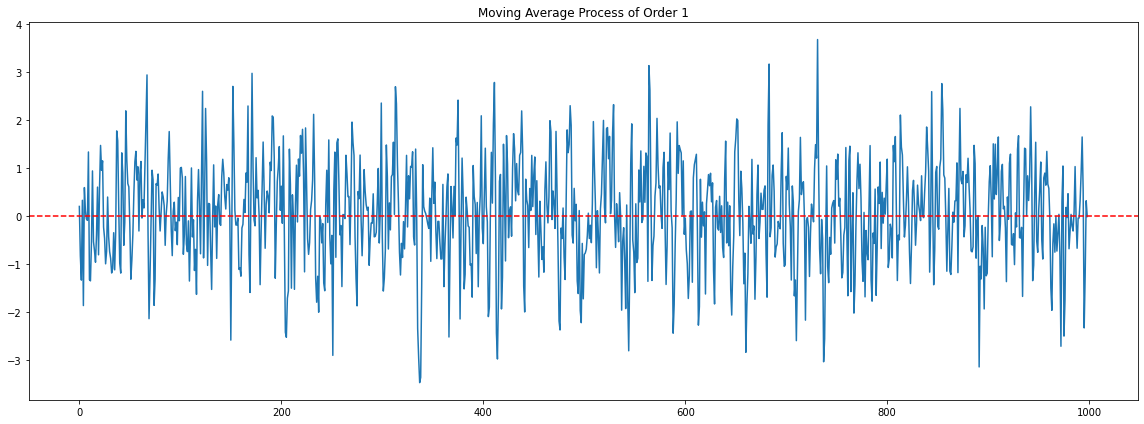

In [638]:
wn_j = wn_generator(n=1000, mean=0, stdev=1, seed_e=1)
ma_1_j = ma_1_generator(alpha=0.5, mean=0, wn=wn_j)

plt.figure(figsize=(16,6))
plt.plot(ma_1_j)
plt.title('Moving Average Process of Order 1')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

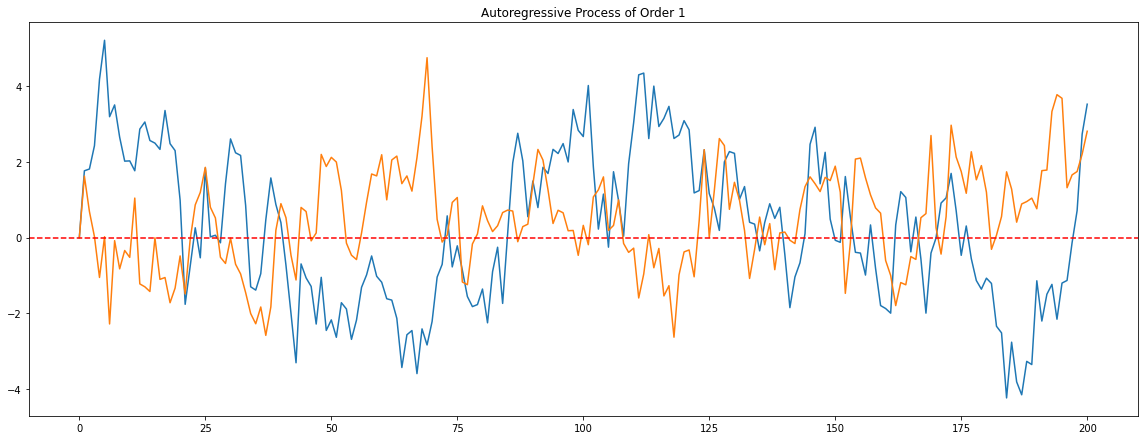

In [637]:
# Autoregressive Process of Order 1 - AR(1):
def ar_generator(wn, drift, phi):
    y = [0]
    for e in wn:
        Y = drift + phi*y[-1] + e
        y.append(Y)
    y = np.array(y)
    return y

walks = list(range(0, 2))

plt.figure(figsize=(16, 6))
for w in walks:
    wn_a = wn_generator(n=200, mean=0, stdev=1, seed_e=w)
    walk_i = rw_generator(wn=wn_a, phi=0.8 ,drift=0)
    plt.plot(walk_i)
    
plt.tight_layout()
plt.axhline(0, color='red', linestyle='--')
plt.title('Autoregressive Process of Order 1')
plt.show()

In [658]:
def correlate_ar(arr_0, p):
    periods = list(range(0, p))
    corr_list = []
    for p in periods:

        arr_t = arr_0[p:]

        if p == 0:
            corr = np.corrcoef(arr_0, arr_t)[0, 1]
            corr_list.append(corr)
        
        else:
            arr_0 = arr_0[:-p]
            corr = np.corrcoef(arr_0, arr_t)[0, 1]
            corr_list.append(corr)

    return corr_list

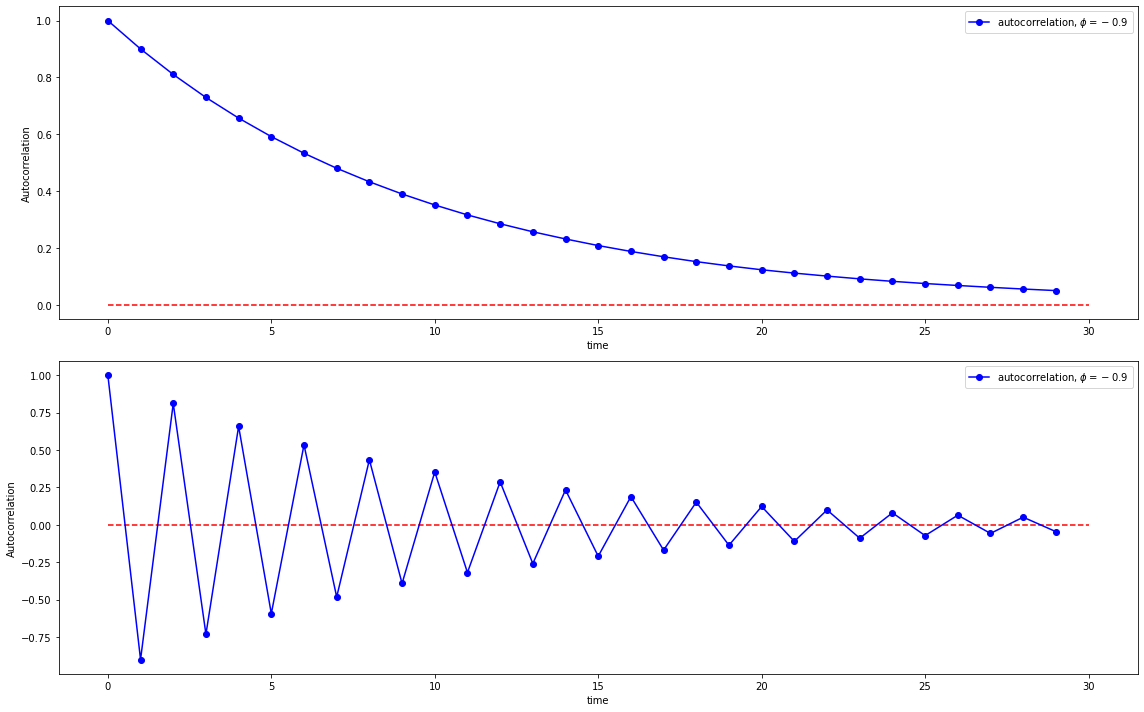

In [659]:
# Autocorrelation function:

num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
plt.subplots_adjust(hspace=.4)

wn_i = wn_generator(n=1000000, mean=1, stdev=1, seed_e=w)

for i, phi in enumerate((0.9, -0.9)):
    ax = axes[i]
    ar_1 = ar_generator(wn=wn_i, drift=0, phi=phi)
    auto_corr = correlate_ar(arr_0=ar_1, p=30)
    ax.plot(auto_corr, 'bo-', label=f'autocorrelation, $\phi={ϕ:.2}$')
    ax.legend(loc='upper right')
    ax.set(xlabel='time', ylabel='Autocorrelation')
    ax.hlines(0, 0, 30 , linestyle='--', color='red')

plt.tight_layout()
plt.show()